# SIR model for Coronavirus 2019- Case US

In [1]:
import numpy as np
import pandas as pd
import Covid19SIRModel
from datetime import date
import matplotlib.pyplot as plt

# SIR model
* S(t) is the number of susceptible individuals. 
\begin{equation*}
\frac{dS(t)}{dt} = -\beta \frac{S(t)I(t)}{N}
\end{equation*}
* I(t) is the number of infected individuals. 
\begin{equation*}
\frac{dI(t)}{dt} = \beta \frac{S(t)I(t)}{N}-\gamma I(t) - \delta I(t)
\end{equation*}
* R(t) is the number of recovered individuals
\begin{equation*}
\frac{dR(t)}{dt} = \gamma I(t)
\end{equation*}
* D(t) is the number of death individuals
\begin{equation*}
\frac{dD(t)}{dt} = \delta I(t)
\end{equation*}

# Read Real data

In [2]:
N = 330430597 # population
COVID19 = Covid19SIRModel.Covid19SIRModel("US",N)
df_trend = COVID19.readData()

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [3]:
df_trend.tail()

,index,Date,Confirmed,Deaths,Recovered,Infected
57,57,2020-03-19,13677.0,200.0,0.0,13477.0
58,58,2020-03-20,19100.0,244.0,0.0,18856.0
59,59,2020-03-21,25489.0,307.0,0.0,25182.0
60,60,2020-03-22,33272.0,417.0,0.0,32855.0
61,61,2020-03-23,33276.0,417.0,178.0,32681.0


/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


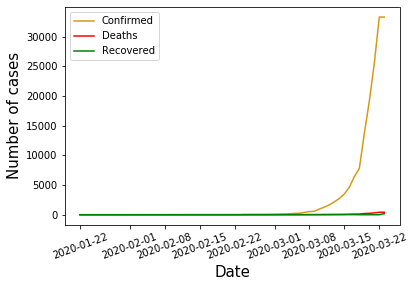

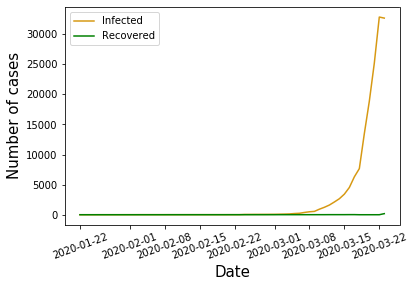

In [4]:
COVID19.plotRealData()

# Data Analysis on Real Data
## Recovered Rate

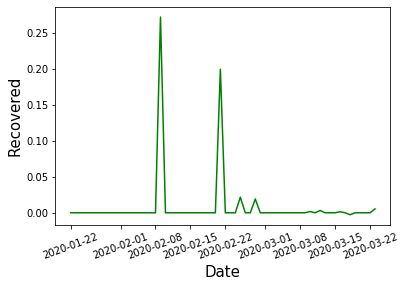

In [5]:
gamma_list = COVID19.calculateRates("gamma", "Recovered")

# Infectious rate

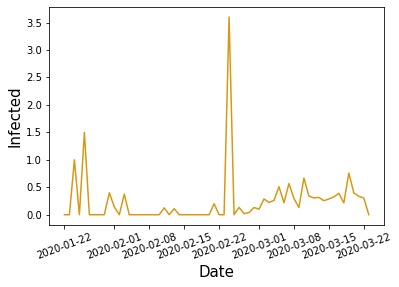

In [6]:
beta_list = COVID19.calculateRates("beta", "Infected")

## Death rate (changing from infectious to deaths)

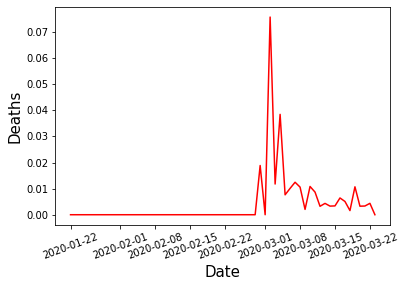

In [7]:
delta_list = COVID19.calculateRates("delta", "Deaths")

# Parameter and initial condition
* $\beta$ is the infectious rate
* $\gamma$ is the recovery rate
* $\delta$ is the death rate

In [10]:
COVID19.setUpInitialCondition()
beta, gamma, delta = COVID19.calculateHyperParameter()

Gamma:  0.0011385733292395865
Delta:  0.002667331900521953



Beta:  0.17


# Modelling

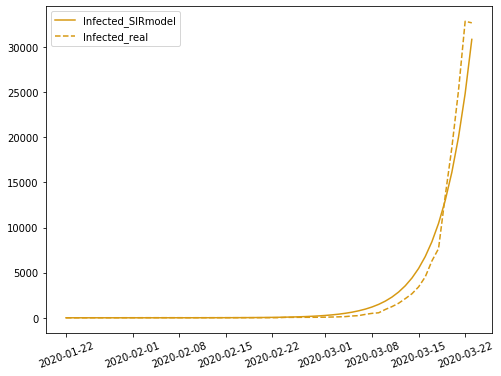

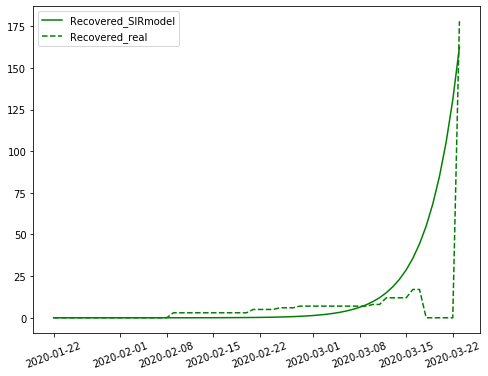

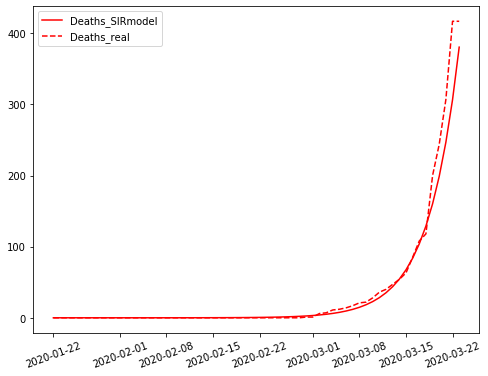

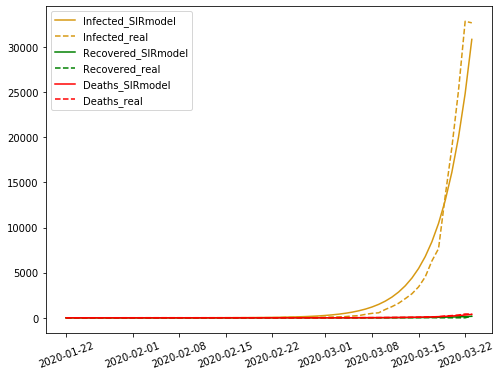

In [13]:
COVID19.setParameter('beta',0.22)
days_shift = 14
S, I, R, D = COVID19.modelling(days_shift)

# Prediction

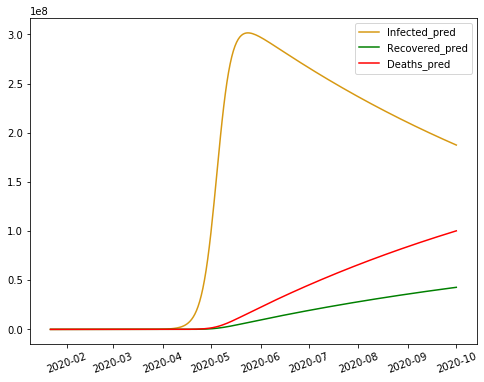

In [14]:
t, S_p, I_p, R_p, D_p = COVID19.prediction('2020-1-22','2020-10-1', days_shift)

In [15]:
data = np.array([list(S_p),list(I_p),list(R_p),list(D_p)])
df = pd.DataFrame({"Date":t,"Infectious":list(I_p),
                   "Recovered":list(R_p),"Deaths":list(D_p)})
df = df.round(0)
df['Newly infected'] = df.Infectious.diff()
df.tail()

,Date,Infectious,Recovered,Deaths,Newly infected
249,2020-09-27,190330667.0,41912248.0,98187682.0,-725761.0
250,2020-09-28,189607663.0,42128542.0,98694393.0,-723004.0
251,2020-09-29,188887405.0,42344014.0,99199179.0,-720258.0
252,2020-09-30,188169883.0,42558667.0,99702047.0,-717522.0
253,2020-10-01,187455087.0,42772506.0,100203005.0,-714796.0


In [17]:
start = '2020-1-22'
end = '2020-10-1'
s = [int(i) for i in start.split("-")]
e = [int(i) for i in end.split("-")]
d0 = date(s[0],s[1],s[2])
d1 = date(e[0],e[1],e[2])
delta = d1 - d0
ndays = delta.days + 1
        
start = pd.Timestamp(start)
end = pd.Timestamp(end)
t = np.linspace(start.value, end.value, ndays)
t = pd.to_datetime(t)

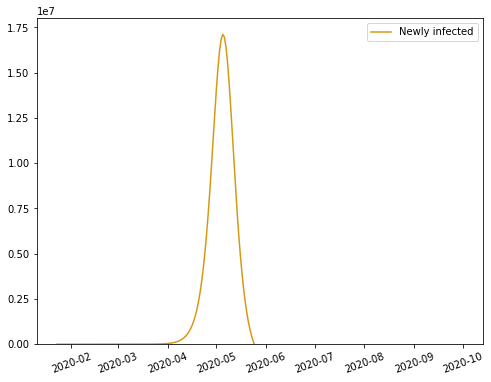

In [18]:
plt.figure(figsize=[8,6])
plt.plot(t, 'Newly infected', data=df, color='#D79913')
plt.xticks(rotation=20)
plt.legend()
plt.ylim(bottom=0) 
plt.show()